# Hindi Speech to Image generation


$$\text{Nishant Verma(12241170)}$$

$$\text{Rajeev Goel(12241460)}$$

$$\text{Soni Kumari(12241780)}$$


###Installing necessary libraries

Here We have used
- ffmpeg-python : to record the audio in .wav format using device's microphone.
- speechrecognition : to transcribe the text from audio to text.
- googletrans : to translate text to english to feed the model.
- diffusers, transformers, scip, ftfy to import a huggingface model "prompthero/openjourney-v4" and further use it.

In [ ]:
!pip install ffmpeg-python

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=6885961e32b63dc96598fac5604e405c70e4563e1cac401a54e434d25099eb1c
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [ ]:
!pip install speechrecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 49.8 MB/s eta 0:00:00


In [ ]:
!pip install diffusers transformers scipy ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00


### Importing the "prompthero/openjourney-v4" model form HuggingFace.

- Here we are importing a stable diffusion pipeline utilising the "prompthero/openjourney-v4" model.
- then using StableDiffusionImg2ImgPipeline() we are achieiving the context retention over generated prompt, using the first_image variable.
- Finally, using the generate_image() we are generating the image of prompt.
- Here, we are using some hyperparameters:
  - num_interface_steps = 30 (standard in 50)
  - height and width as 512 (is standard)


This speeds up the image generation process by 1.5 times!

In [ ]:
import torch
from PIL import Image
from torchvision import transforms
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = StableDiffusionPipeline.from_pretrained(
    "prompthero/openjourney-v4",
    torch_dtype=torch.float16
)
pipe = pipe.to(device)
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "prompthero/openjourney-v4",
    torch_dtype=torch.float16
)
img2img_pipe = img2img_pipe.to(device)
def generate_image(prompt, image=None, num_inference_steps=30, height=512, width=512):
    if image is None:
        image = pipe(prompt, num_inference_steps=num_inference_steps, height=height, width=width).images[0]
    else:
        image = img2img_pipe(prompt, image=image, num_inference_steps=num_inference_steps, height=height, width=width).images[0]
    return image


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.53k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Using ffmpeg we are enabling the system's microphone to record audio

- We are using the javascript to access the recorder of the system.
- Running it for some defined no. of seconds.
- Saving the audio file as my_audio.wav


In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})

var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record_audio(sec=5):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  return b

In [ ]:
import ffmpeg

def save_as_wav(audio_data, filename="audio.wav"):
  process = (
      ffmpeg
      .input('pipe:', format='webm')
      .output(filename, format='wav', acodec='pcm_s16le', ac=1, ar='16k')
      .overwrite_output()
      .run_async(pipe_stdin=True)
  )
  process.stdin.write(audio_data)
  process.stdin.close()
  process.wait()

In [23]:
audio_data = record_audio(5)
save_as_wav(audio_data, "my_audio.wav")

<IPython.core.display.Javascript object>

### Defining necessary function for clean pipeline

- record(time) :
  - **time** parameter is used to secify the no. of seconds we wnat to record the audio.
  - This Fuction to record the audio and save it as "my_audio.wav". and returning the path.
- speech_to_text(audio):
  - **audio** is the path of the audio.
  - **speech_recognition** is used here for this.
  - Audio can be in hindi or english.
  - Audio file must be in .wav format which is taken care by the by **ffmpeg** while recording
- translate_to_english(text):
  - **text** is the text transcribed by the speech_recogniizer.
  - using the googletrans
- generate_sub_sentences(text, beam_size)
  - is used to generate the sequential prompts with words varying by beam_size of 3
  - prompt = "A cat is sitting on a mat"
  
    Output
    ```
    [
      "A cat is",
      "A cat is sitting on a",
      "A cat is sitting on a mat"
    ]

  

In [34]:
from googletrans import Translator
import speech_recognition as sr

In [37]:
def record(time):
  print("Recording...")
  audio_data = record_audio(time)
  save_as_wav(audio_data, "my_audio.wav")
  return "my_audio.wav"

In [70]:
def speech_to_text(audio):
      recognizer = sr.Recognizer()
      with sr.AudioFile(audio) as source:
          audio = recognizer.record(source)
          try:
              text = recognizer.recognize_google(audio, language='hi-IN')
              print("Transcribed Text : ", text)
              return text
          except sr.UnknownValueError:
              print("Could not understand audio")
              return ""

In [26]:
def translate_to_english(text):
  translator = Translator()
  translation = translator.translate(text, dest='en')
  print("Translated Text : ",translation.text)
  return translation.text

In [31]:
def generate_sub_sentences(text, beam_size):
    words = text.split()
    sub_sentences = [""]

    for i in range(0, len(words), beam_size):
        sub_sentence = ' '.join([sub_sentences[-1], ' '.join(words[i:i + beam_size])]).strip()
        sub_sentences.append(sub_sentence)

    return sub_sentences[1:]

## One-time image generation from prompt

### PipeLine

In [35]:
import matplotlib.pyplot as plt

In [73]:
def Pipeline():
  audio = record(5)
  text = speech_to_text(audio)
  if(text):
    translation = translate_to_english(text)
    sub_sentences = generate_sub_sentences(translation, beam_size=3)
    first_image = None
    for prompt in sub_sentences:
        print(prompt)
        image = generate_image(prompt, first_image)
        image.save(f"{prompt}.png")
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        first_image = image


###Sample Outputs

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  एक पहाड़ के ऊपर सूर्यास्त हो रहा है
Translated Text :  sunset over a mountain
sunset over a


  0%|          | 0/50 [00:00<?, ?it/s]

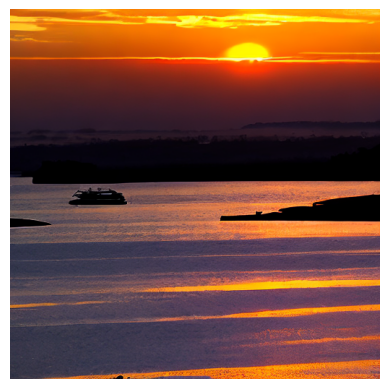

sunset over a mountain


  0%|          | 0/40 [00:00<?, ?it/s]

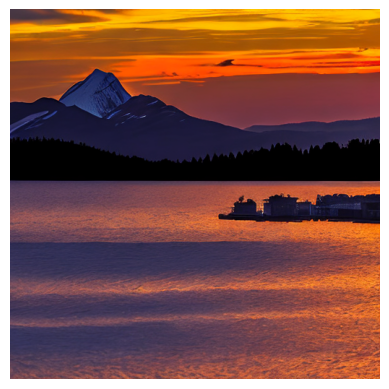

In [43]:
Pipeline()

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  सूर्यास्त की सुनहरी रोशनी में एक क्षण
Translated Text :  A moment in the golden light of sunset
A moment in


  0%|          | 0/50 [00:00<?, ?it/s]

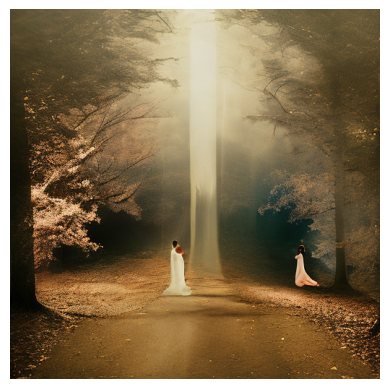

A moment in the golden light


  0%|          | 0/40 [00:00<?, ?it/s]

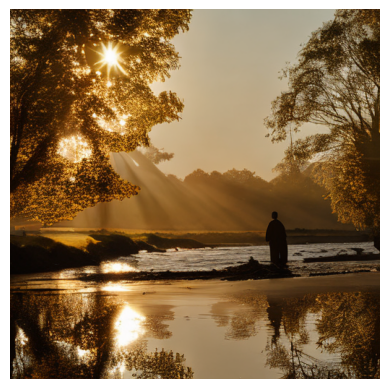

A moment in the golden light of sunset


  0%|          | 0/40 [00:00<?, ?it/s]

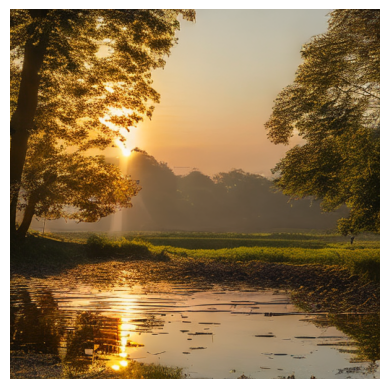

In [47]:
Pipeline()

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  नाच न जाने आंगन टेढ़ा
Translated Text :  A bad workman blames his tools.
A bad workman


  0%|          | 0/50 [00:00<?, ?it/s]

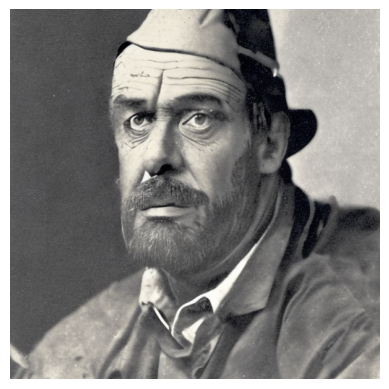

A bad workman blames his tools.


  0%|          | 0/40 [00:00<?, ?it/s]

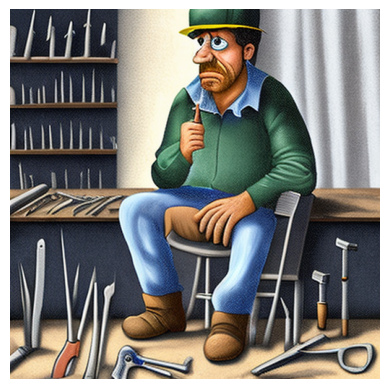

In [48]:
Pipeline()

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  छठ दिनम
Translated Text :  Chhath Dinam
Chhath Dinam


  0%|          | 0/50 [00:00<?, ?it/s]

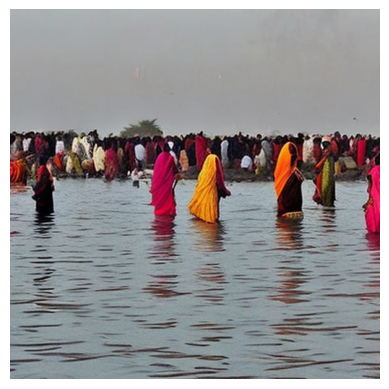

In [59]:
Pipeline()

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  एक खरगोश सरसों के खेत में
Translated Text :  A rabbit in a mustard field
A rabbit in


  0%|          | 0/50 [00:00<?, ?it/s]

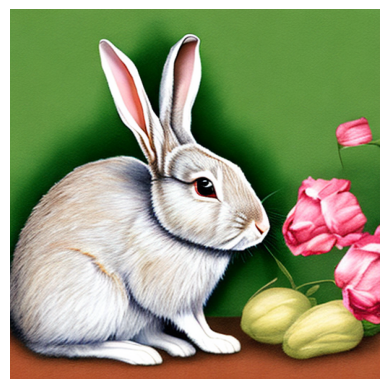

A rabbit in a mustard field


  0%|          | 0/40 [00:00<?, ?it/s]

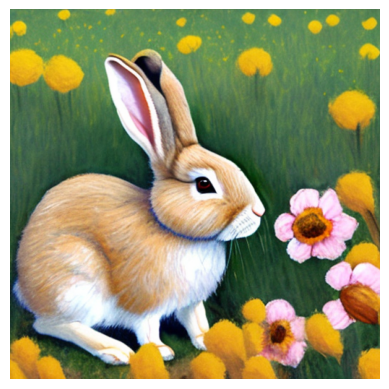

In [62]:
Pipeline()

## Recurrent Image generation from prompts


### Pipeline with loop

In [77]:
def Pipeline_with_loop():
  first_image = None
  while True:
    audio = record(3)
    text = speech_to_text(audio)
    if(text):
      translation = translate_to_english(text)
      sub_sentences = generate_sub_sentences(translation, beam_size=3)
      for prompt in sub_sentences:
          print(prompt)
          image = generate_image(prompt, first_image)
          image.save(f"{prompt}.png")
          plt.imshow(image)
          plt.axis('off')
          plt.show()
          first_image = image
      print("Do you want to continue? (y/n)")
      response = input().lower()
      if response != 'y':
          break

### Samples

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  सूर्यास्त होता हुआ
Translated Text :  sunset
sunset


  0%|          | 0/50 [00:00<?, ?it/s]

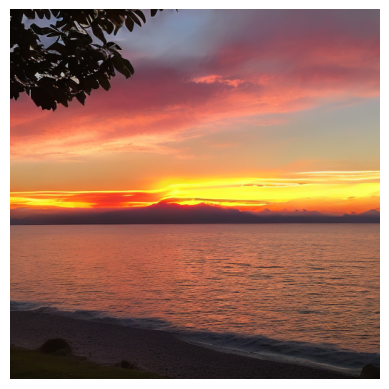

Do you want to continue? (y/n)
y
Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  एक आदमी खड़ा हुआ है
Translated Text :  a man is standing
a man is


  0%|          | 0/40 [00:00<?, ?it/s]

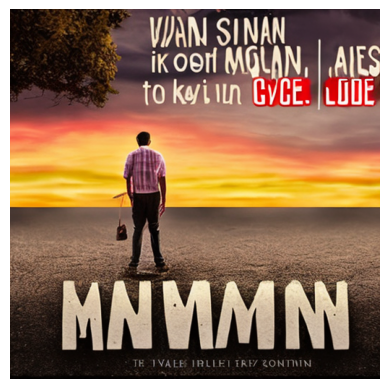

a man is standing


  0%|          | 0/40 [00:00<?, ?it/s]

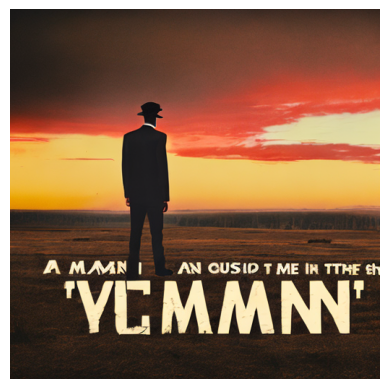

Do you want to continue? (y/n)
y
Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  ऊपर से बम गिर रहे हैं
Translated Text :  bombs falling from above
bombs falling from


  0%|          | 0/40 [00:00<?, ?it/s]

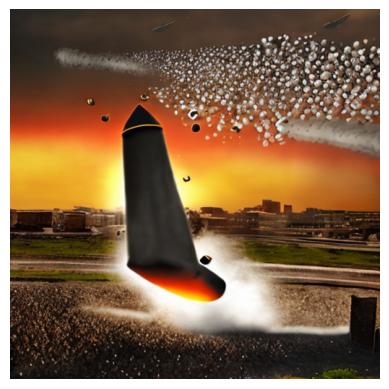

bombs falling from above


  0%|          | 0/40 [00:00<?, ?it/s]

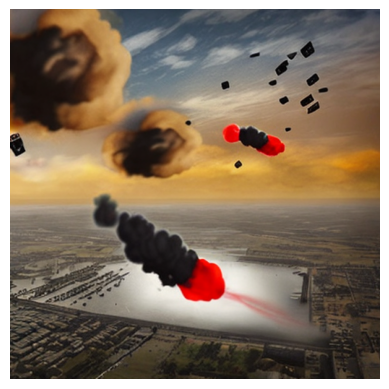

Do you want to continue? (y/n)
n


In [53]:
Pipeline_with_loop()

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  एक पहाड़ के ऊपर सूर्यास्त हो रहा है
Translated Text :  sunset over a mountain
sunset over a


  0%|          | 0/50 [00:00<?, ?it/s]

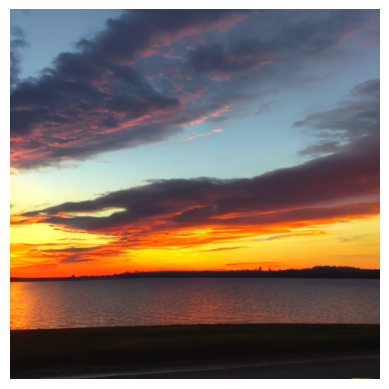

sunset over a mountain


  0%|          | 0/40 [00:00<?, ?it/s]

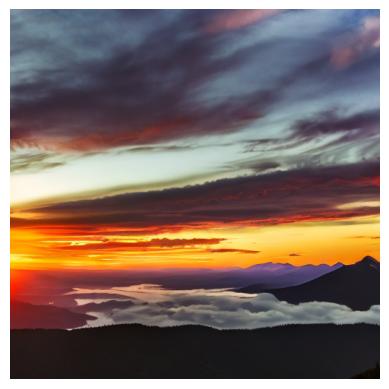

Do you want to continue? (y/n)
y
Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  अब पहाड़ के पास एक झील
Translated Text :  now a lake near the mountain
now a lake


  0%|          | 0/40 [00:00<?, ?it/s]

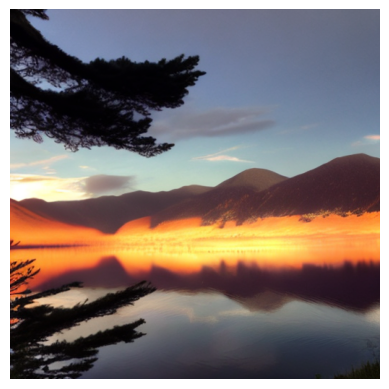

now a lake near the mountain


  0%|          | 0/40 [00:00<?, ?it/s]

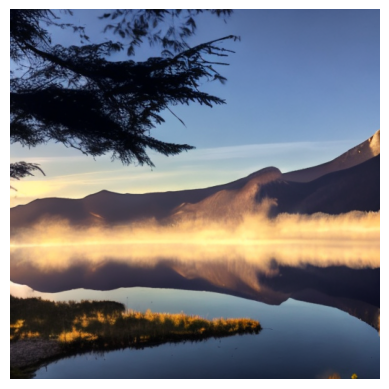

Do you want to continue? (y/n)
y
Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  झील में सूर्य का प्रतिबिंब दिखाई दे
Translated Text :  Sun's reflection visible in the lake
Sun's reflection visible


  0%|          | 0/40 [00:00<?, ?it/s]

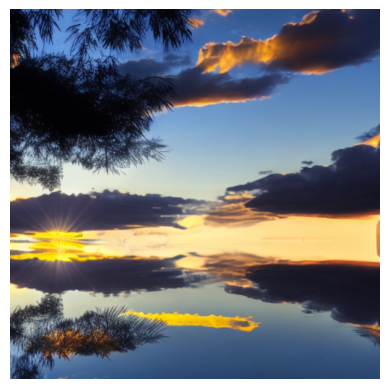

Sun's reflection visible in the lake


  0%|          | 0/40 [00:00<?, ?it/s]

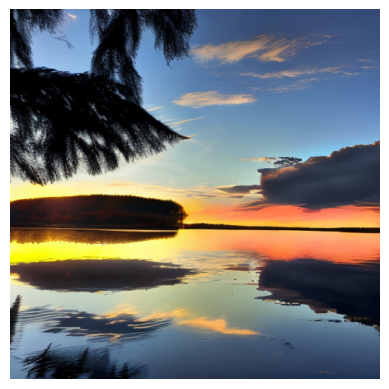

Do you want to continue? (y/n)
n


In [56]:
Pipeline_with_loop()

Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  सनसेट ओवर माउंटेन
Translated Text :  Sunset Over Mountain
Sunset Over Mountain


  0%|          | 0/50 [00:00<?, ?it/s]

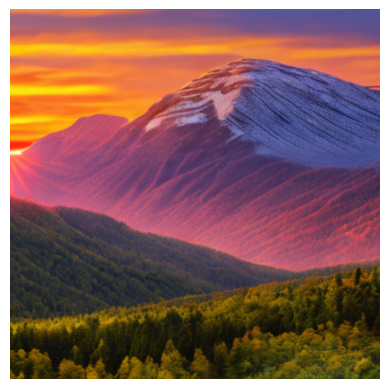

Do you want to continue? (y/n)
y
Recording...


<IPython.core.display.Javascript object>

Transcribed Text :  ए प्लेन इस फ्लाइंग ओवर थे माउंटेन
Translated Text :  A plane is flying over the mountain
A plane is


  0%|          | 0/40 [00:00<?, ?it/s]

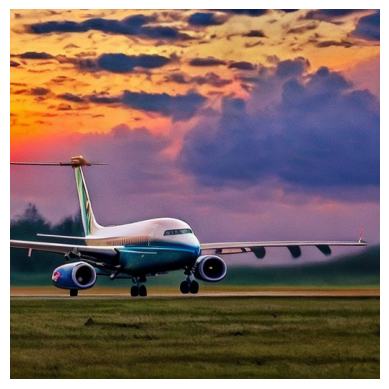

A plane is flying over the


  0%|          | 0/40 [00:00<?, ?it/s]

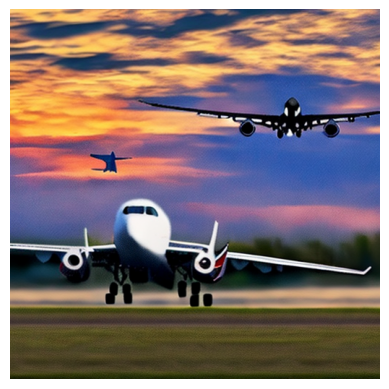

A plane is flying over the mountain


  0%|          | 0/40 [00:00<?, ?it/s]

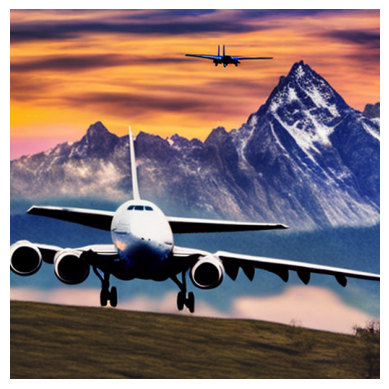

Do you want to continue? (y/n)
n


In [57]:
Pipeline_with_loop()